# Setup

**GPU necessária**

In [0]:
!pip install tensorflow-gpu==2.0.0-alpha0

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D

%matplotlib inline

# Data Loading

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1) / 255
x_test = np.expand_dims(x_test, axis=-1) / 255

x_train = np.where(x_train > 0.5, 1, 0)
x_test = np.where(x_test > 0.5, 1, 0)

print(x_train.shape, x_train.dtype)
print(x_test.shape, x_test.dtype)

(60000, 28, 28, 1) int64
(10000, 28, 28, 1) int64


# Autoencoder

In [0]:
model = Sequential()

#encoder
model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28,28,1 )))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

#decoder
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(UpSampling2D(size=(2,2)))
model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(UpSampling2D(size=(2,2)))
model.add(Conv2D(filters=1, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='sigmoid'))
          
model.summary()
          
model.compile(optimizer='adam', loss='binary_crossentropy')

hist = model.fit(x_train, x_train, batch_size=128, epochs=8, validation_data=(x_train, x_train))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_14 (UpSampling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 14, 14, 16)       

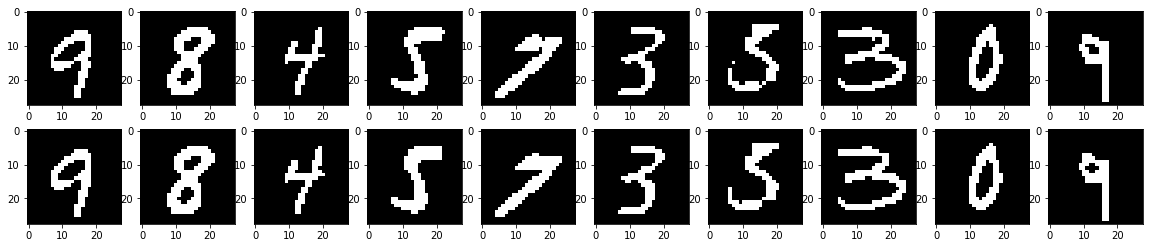

In [0]:
n_imgs = 10

random_idxs = np.random.choice(range(x_test.shape[0]), size=n_imgs)
im_ori = x_test[random_idxs]
im_dec = model.predict_classes(im_ori)

plt.figure(figsize=(20, 4))
for i in range(n_imgs):
    plt.subplot(2, n_imgs, i + 1)
    plt.imshow(im_ori[i].reshape(28, 28), cmap='gray')
    
    plt.subplot(2, n_imgs, i + 1 + n_imgs)
    plt.imshow(im_dec[i].reshape(28, 28), cmap='gray')